In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("songs.csv")

In [3]:
df = df[["Context", "tempo", "danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence"]]
df.Context = df.Context.astype("category")
grouped = df.groupby(df.Context)
df_walking = grouped.get_group("Walking")
df_studying = grouped.get_group("Studying")

In [4]:
min_max = MinMaxScaler()
df_studying.loc[:, "tempo":] = min_max.fit_transform(df_studying.loc[:, "tempo":])
df_walking.loc[:, "tempo":] = min_max.fit_transform(df_walking.loc[:, "tempo":])

C:\Python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
C:\Python39\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [5]:
df_studying = df_studying.drop("Context", 1)
df_walking = df_walking.drop("Context", 1)

In [6]:
labels = list(df_studying)[:]
features_studying = df_studying.mean().tolist()
features_walking = df_walking.mean().tolist()
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
features_studying += features_studying[:1]
features_walking += features_walking[:1]
angles += angles[:1]

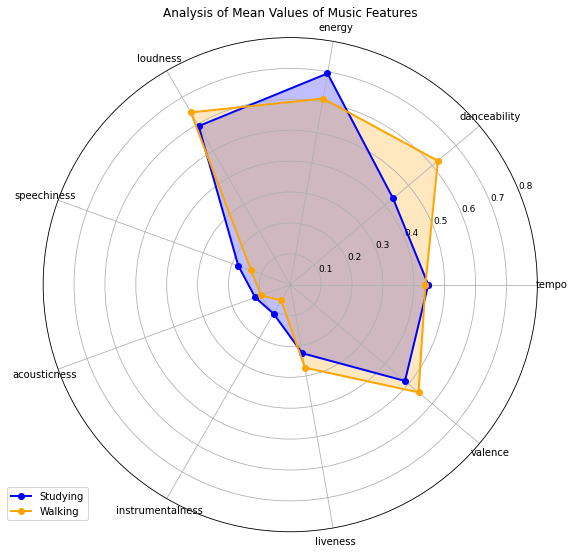

In [7]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221, polar=True)
ax.plot(angles, features_studying, 'o-', linewidth=2, label = "Studying", color= 'blue')
ax.fill(angles, features_studying, alpha=0.25, facecolor='blue')

ax.plot(angles, features_walking, 'o-', linewidth=2, label = "Walking", color= 'orange')
ax.fill(angles, features_walking, alpha=0.25, facecolor='orange')
ax.set_title("Analysis of Mean Values of Music Features")

plt.xticks(angles[:-1], labels)

# lol

plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8'], size=9)
plt.ylim(0,0.8)
plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))

plt.show()